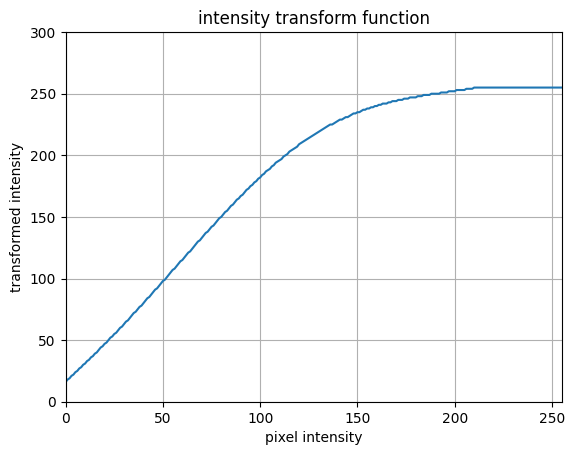

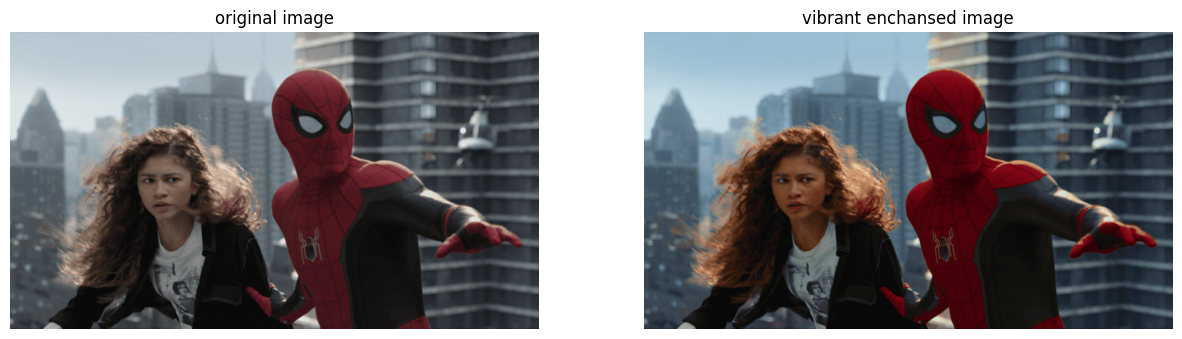

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"a1images/a1images/spider.png" , )
assert img is not None, "file could not be read, check with os.path.exists()"
 
#splite the image into hue, saturation and value
splited_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H , S , V = cv.split(splited_img)


#intensity transform function
# Define the intensity transform function
a = 0.7
sigma = 70
t = np.array([p + a * 128 * np.exp(-(p - 128)**2 / (2 * sigma**2)) for p in range(256)])

# Clip values to make sure they are in the range [0, 255]
t_clipped = np.clip(t, 0, 255).astype(np.uint8)

#apply the intensity transform function to the saturate channel
s_transformed = cv.LUT(S, t_clipped)


#merge the channels
result = cv.merge([H, s_transformed, V])
result = cv.cvtColor(result, cv.COLOR_HSV2RGB)

#plot the transformation
plt.plot(t_clipped)
plt.xlabel("pixel intensity")
plt.ylabel("transformed intensity")
plt.title("intensity transform function")
plt.axis([0, 255, 0, 300])
plt.grid()
plt.show()


#show the image
fig , ax = plt.subplots(1, 2 , figsize=(15, 10))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("original image")
ax[0].axis("off")
ax[1].imshow(result)
ax[1].set_title("vibrant enchansed image")
ax[1].axis("off")



plt.show()
